In [14]:
import pandas as pd

df = pd.read_csv('US-pumpkins.csv')
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [15]:
#filter out any rows that dont use price per bushel
pumpkins = df[df['Package'].str.contains('bushel',case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [16]:
#counts how many cells in each column are empty
pumpkins.isnull().sum()

,0
City Name,0
Type,406
Package,0
Variety,0
Sub Variety,167
Grade,415
Date,0
Low Price,0
High Price,0
Mostly Low,24


In [17]:
#define the columns we want to keep
new_columns=['Package', 'month', 'Low Price', 'High Price', 'Date']
#dropall other columns
#counts how many cells in each column are empty
pumpkins=pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)


In [23]:
#calculate the average price from the high and low price columns
price=(pumpkins['Low Price']+pumpkins['High Price'])/2
pumpkins['Price']=price

#Get the month from the date column
month=pd.DatetimeIndex(pumpkins['Date']).month
pumpkins['Month']=month

#Create a new data frame with these columns
new_pumpkins = pd.DataFrame({
    'Month': pumpkins['Month'],          # Correcta referencia a 'Month'
    'Package': pumpkins['Package'],      # Referencia a la columna 'Package'
    'Low Price': pumpkins['Low Price'],  # Usar comillas y nombre correcto
    'High Price': pumpkins['High Price'] # Corregir el nombre de 'High Price'
})


In [28]:
# Calcular el precio promedio a partir de las columnas 'Low Price' y 'High Price' y asegurarse de que se cree la columna 'Price'
new_pumpkins['Price'] = (new_pumpkins['Low Price'] + new_pumpkins['High Price']) / 2

# Convertir el precio para los paquetes que contienen '1 1/9 bushels', dividiendo por (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = new_pumpkins['Price'] / (1 + 1/9)

# Convertir el precio para los paquetes que contienen '1/2 bushels', dividiendo por 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = new_pumpkins['Price'] / (1/2)


In [29]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [30]:
#print the last few rows from the data frame
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


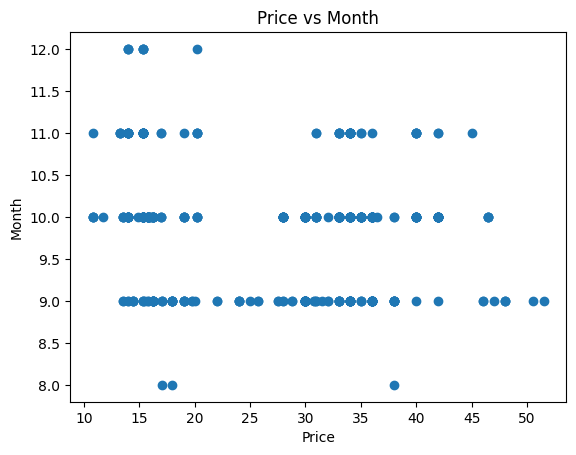

In [34]:
import matplotlib.pyplot as plt
#ge the values we want to plot
price=new_pumpkins['Price']
month=new_pumpkins['Month']

#create  a show a scatter plot of price vs month
plt.scatter(price,month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.title('Price vs Month')
plt.show() # Changed ptl to plt

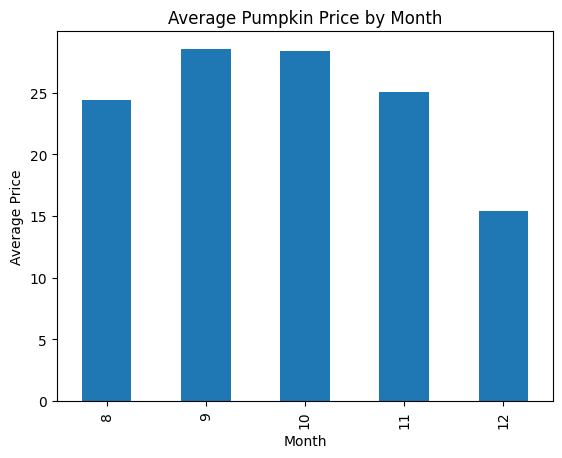

In [37]:
#Group the pumpkins into a bar chart by month and price, using only numeric columns
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar') # Changed groupby to only group by 'Month' and calculate mean of 'Price'
plt.xlabel('Month')
plt.ylabel('Average Price') # Changed ylabel to reflect the average price
plt.title('Average Pumpkin Price by Month') # Changed title to reflect the average price by month
plt.show()